In [32]:
%matplotlib inline

import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import lightgbm as lgb
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/train.csv')

In [4]:
test = pd.read_csv('../data/test.csv')

In [6]:
submission = pd.read_csv('../data/submit_example.csv')

In [3]:
train.head()

,id,flag,title,content
0,3701be69fdea4881874d073b8cc3bfdb,1,办理了ETC高速浪一下，一出门就遇到阿尔法，100万哪，老款的我坐过也开过，确实好车，但是没...,办理了ETC高速浪一下，一出门就遇到阿尔法，100万哪，老款的我坐过也开过，确实好车，但是没...
1,967b683e4742489fb4738eb7d5f0ae4e,0,秋介绍~,秋介绍~
2,f98f7ea52a9b460dbc7d32b4114b925b,1,"""精""改埃尔法提车记！",因为手上的两地牌关系，一直都喜欢买跑车开，觉得用了两地牌在国内开，而且完善的赛道设施，...
3,8cce3056ad9b453996f22508cf5e1d28,0,?里有卖？怎么联系？,?里有卖？怎么联系？
4,0835ce6f7fcb4c7b96490b65f66a65f9,1,“宜”与“亦”之间的区别？这辆车可以回答,灵山清净，拈花一笑。没想到这次的试驾地竟是如此禅意：太湖...


In [9]:
title = train['title']

In [11]:
result = []
for x in title:
    result.append(list(jieba.cut(x)))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Dumping model to file cache /tmp/jieba.cache
Dump cache file failed.
Traceback (most recent call last):
  File "/disk/m/jupyter/anaconda/envs/rs_python36/lib/python3.6/site-packages/jieba/__init__.py", line 152, in initialize
    _replace_file(fpath, cache_file)
PermissionError: [Errno 1] Operation not permitted: '/tmp/tmpvhcxtx_s' -> '/tmp/jieba.cache'
Loading model cost 0.936 seconds.
Prefix dict has been built succesfully.


In [15]:
r2 = []
for x in result:
    r2.append(' '.join(x))

In [16]:
len(r2)

3993

In [18]:
r2[:2]

['办理 了 ETC 高速 浪 一下 ， 一 出门 就 遇到 阿尔法 ， 100 万 哪 ， 老款 的 我 坐 过 也 开过 ， 确实 好车 ， 但是 没 感觉 值 那么 多 ， 中国 豪人 太多 。   走 磨合 测试 定速巡航   父亲 没空 就 带 着 家里 的 各位 老板 们 兜风     途中 也 感受 下 老板 位 舒服 不 ， 辛苦 大 老板 了 ， 舒适版 有个 好处 ， 可以 不用 下车 就 可以 在 车内 完成 换 司机 的 任务 ， 这个 对于 下雨天 啥 的 ， 非常 实用 。     三 老板 ， 其实 是 最大 的 老板 ， 哭 起来 ， 我 都 要 投降   二老板     趁着 假装 老板 的 机会 好好 感受 下车 内 ， 第 2 排 左侧 位置 放个 纸巾 不错   中间 没有 扶手 的 好处 可以 放 相机包 还有 垃圾桶 ， 这个 建议 大家 都 要备 一个 ， 乱',
 '秋 介绍 ~']

In [19]:
tf = TfidfVectorizer()
train_x = tf.fit_transform(r2)

In [22]:
model = lgb.LGBMClassifier()
model.fit(train_x, train['flag'])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [23]:
test_x = []
for x in test['title']:
    test_x.append(' '.join(list(jieba.cut(x))))

In [24]:
test_x = tf.transform(test_x)

In [25]:
pred = model.predict_proba(test_x)

In [28]:
submission['score'] = pred[:,1]

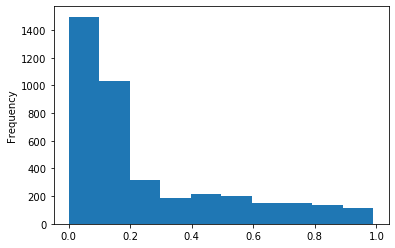

In [33]:
submission['score'].plot(kind='hist')

In [35]:
train['flag'].value_counts(1)

0    0.747558
1    0.252442
Name: flag, dtype: float64

In [34]:
del submission['flag']

In [39]:
submission['flag'] = np.where(submission['score']>0.4, 1, 0)

In [40]:
submission['flag'].value_counts(1)

0    0.761833
1    0.238167
Name: flag, dtype: float64

In [42]:
submission[['id','flag']].to_csv('sub.csv', index=None)

In [41]:
submission.head()

,id,score,flag
0,fb2f2659a15545a8bd54d543a6d09b63,0.489031,1
1,fc82f947e7674fbf92be4910afc147eb,0.001445,0
2,5b8e2c0aca1a4a8a9ac9416dafdea83f,0.002194,0
3,ea7cadf376fd494fb98e78f5a5306972,0.171535,0
4,2f3e53022a204242bd2623d69aac8353,0.171535,0


In [5]:
test.head()

,id,title,content
0,fb2f2659a15545a8bd54d543a6d09b63,mb 现在都加价,mb 现在都加价
1,fc82f947e7674fbf92be4910afc147eb,"既然有这个加装的想法,你是可以去当地的专业汽车改装装饰店看看的,多走几家对比了解一下哪家好。","既然有这个加装的想法,你是可以去当地的专业汽车改装装饰店看看的,多走几家对比了解一下哪家好。"
2,5b8e2c0aca1a4a8a9ac9416dafdea83f,已经关注了价格多少,已经关注了价格多少
3,ea7cadf376fd494fb98e78f5a5306972,，额色222色啊啊啊-.饿死我我晚上 哇数学，，，，，众互相学习那我问问色鬼v我问问色巫毒娃...,，额色222色啊啊啊-.饿死我我晚上 哇数学，，，，，众互相学习那我问问色鬼v我问问色巫毒娃...
4,2f3e53022a204242bd2623d69aac8353,“佳人”相伴，坐享其程，坐看雪景，圆满,一般我们买车是因为有这个需求，考虑到家庭人员多，对车子乘坐空间和舒适性上，都是有比较高要...


In [7]:
submission.head()

,id,flag
0,fb2f2659a15545a8bd54d543a6d09b63,0
1,fc82f947e7674fbf92be4910afc147eb,0
2,5b8e2c0aca1a4a8a9ac9416dafdea83f,0
3,ea7cadf376fd494fb98e78f5a5306972,0
4,2f3e53022a204242bd2623d69aac8353,0
